# Linear Model and Neural Networks from scratch

To build a deep n-layer neural network from scratch

<a name='1'></a>
## 1 - Packages ##

First, let's run the cell below to import all the packages that you will need during this assignment. 
- [numpy](https://numpy.org/doc/1.20/) is the fundamental package for scientific computing with Python.
- [h5py](http://www.h5py.org) is a common package to interact with a dataset that is stored on an H5 file.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.
- [PIL](https://pillow.readthedocs.io/en/stable/) and [scipy](https://www.scipy.org/) are used here to test your model with your own picture at the end.

In [ ]:
### v1.2

In [5]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
import sklearn
import sklearn.datasets
import pandas as pd
import torch

%matplotlib inline
%load_ext autoreload
%autoreload 2

<a name='2'></a>
## 2 - Overview of the Problem set ##

**Problem Statement**: You are given a dataset ("data.h5") containing:
    - a training set of m_train images labeled as cat (y=1) or non-cat (y=0)
    - a test set of m_test images labeled as cat or non-cat
    - each image is of shape (num_px, num_px, 3) where 3 is for the 3 channels (RGB). Thus, each image is square (height = num_px) and (width = num_px).

You will build a simple image-recognition algorithm that can correctly classify pictures as cat or non-cat.

Let's get more familiar with the dataset. Load the data by running the following code.

DATA PREPROCESSING

In [ ]:
train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels
train_set_y_orig.reshape(209, 1)

In [ ]:
test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels
test_set_y_orig.reshape(np.size(test_set_y_orig, 0), 1)

In [ ]:
 classes = np.array(test_dataset["list_classes"][:]) # the list of classes
classes.reshape((classes.shape[0], 1))

In [94]:
def load_dataset():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    classes.reshape((classes.shape[0], 1))

    train_set_y_orig =train_set_y_orig.reshape(np.size(train_set_y_orig, 0), 1)
    test_set_y_orig = test_set_y_orig.reshape(np.size(test_set_y_orig, 0), 1)
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [95]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

In [103]:
train_set_x_orig.shape

(209, 64, 64, 3)

In [ ]:


  

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    #return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

We added "_orig" at the end of image datasets (train and test) because we are going to preprocess them. After preprocessing, we will end up with train_set_x and test_set_x (the labels train_set_y and test_set_y don't need any preprocessing).

Each line of your train_set_x_orig and test_set_x_orig is an array representing an image. You can visualize an example by running the following code. Feel free also to change the `index` value and re-run to see other images. 

y = [1], it's a 'cat' picture.


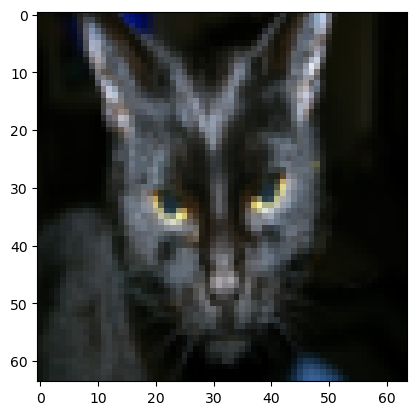

In [8]:
# Example of a picture
index = 25
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[index]) + ", it's a '" + classes[np.squeeze(train_set_y[index])].decode("utf-8") +  "' picture.")

Many software bugs in deep learning come from having matrix/vector dimensions that don't fit. If you can keep your matrix/vector dimensions straight you will go a long way toward eliminating many bugs. 

<a name='ex-1'></a>
### Exercise 1
Find the values for:
    - m_train (number of training examples)
    - m_test (number of test examples)
    - num_px (= height = width of a training image)
Remember that `train_set_x_orig` is a numpy-array of shape (m_train, num_px, num_px, 3). For instance, you can access `m_train` by writing `train_set_x_orig.shape[0]`.

In [ ]:
#(≈ 3 lines of code)
# m_train = 
# m_test = 
# num_px = 
# YOUR CODE STARTS HERE
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px =train_set_x_orig.shape[1]

# YOUR CODE ENDS HERE

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

In [ ]:
train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).shape

**Expected Output for m_train, m_test and num_px**: 
<table style="width:15%">
  <tr>
    <td> m_train </td>
    <td> 209 </td> 
  </tr>
  
  <tr>
    <td>m_test</td>
    <td> 50 </td> 
  </tr>
  
  <tr>
    <td>num_px</td>
    <td> 64 </td> 
  </tr>
  
</table>


For convenience, you should now reshape images of shape (num_px, num_px, 3) in a numpy-array of shape (num_px $*$ num_px $*$ 3, 1). After this, our training (and test) dataset is a numpy-array where each column represents a flattened image. There should be m_train (respectively m_test) columns.

<a name='ex-2'></a>
### Exercise 2
Reshape the training and test data sets so that images of size (num_px, num_px, 3) are flattened into single vectors of shape (num\_px $*$ num\_px $*$ 3, 1).

A trick when you want to flatten a matrix X of shape (a,b,c,d) to a matrix X_flatten of shape (b$*$c$*$d, a) is to use: 
```python
X_flatten = X.reshape(X.shape[0], -1).T      # X.T is the transpose of X
```

In [ ]:
# Reshape the training and test examples
#(≈ 2 lines of code)
# train_set_x_flatten = ...
# test_set_x_flatten = ...
# YOUR CODE STARTS HERE
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1)

test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1)

# YOUR CODE ENDS HERE

# Check that the first 10 pixels of the second image are in the correct place
#assert np.alltrue(train_set_x_flatten[0:10, 1] == [196, 192, 190, 193, 186, 182, 188, 179, 174, 213]), "Wrong solution. Use (X.shape[0], -1).T."
#assert np.alltrue(test_set_x_flatten[0:10, 1] == [115, 110, 111, 137, 129, 129, 155, 146, 145, 159]), "Wrong solution. Use (X.shape[0], -1).T."

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

**Expected Output**: 

<table style="width:35%">
  <tr>
    <td>train_set_x_flatten shape</td>
    <td> (12288, 209)</td> 
  </tr>
  <tr>
    <td>train_set_y shape</td>
    <td>(1, 209)</td> 
  </tr>
  <tr>
    <td>test_set_x_flatten shape</td>
    <td>(12288, 50)</td> 
  </tr>
  <tr>
    <td>test_set_y shape</td>
    <td>(1, 50)</td> 
  </tr>
</table>

To represent color images, the red, green and blue channels (RGB) must be specified for each pixel, and so the pixel value is actually a vector of three numbers ranging from 0 to 255.

One common preprocessing step in machine learning is to center and standardize your dataset, meaning that you substract the mean of the whole numpy array from each example, and then divide each example by the standard deviation of the whole numpy array. But for picture datasets, it is simpler and more convenient and works almost as well to just divide every row of the dataset by 255 (the maximum value of a pixel channel).

<!-- During the training of your model, you're going to multiply weights and add biases to some initial inputs in order to observe neuron activations. Then you backpropogate with the gradients to train the model. But, it is extremely important for each feature to have a similar range such that our gradients don't explode. You will see that more in detail later in the lectures. !--> 

Let's standardize our dataset.

In [ ]:
train_set_x = train_set_x_flatten / train_set_x_flatten.max(axis=0)
test_set_x = test_set_x_flatten / 255

train_set_x[0]

In [13]:
np.random.seed(2)
init_parameters = np.random.randn(train_set_x.shape[1])
init_parameters = init_parameters.reshape(init_parameters.shape[0], 1)


In [14]:
preds = np.dot(train_set_x, init_parameters)
print(preds.shape)
#print((preds-train_set_y).shape)


(209, 1)


In [15]:
cost = np.abs(train_set_y - preds).mean()
print(cost)


69.18049237056111


In [16]:
np.random.seed(2)

def initialize_coeffs(X):   

    coeffs = np.random.randn(X.shape[1]) * 0.01

    return coeffs.reshape(coeffs.shape[0], 1)

def calc_preds(X, coeffs):  return np.dot(X, coeffs)

def calc_cost(X, coeffs, Y): return np.abs(calc_preds(X, coeffs) - Y).mean()

calc_cost( train_set_x, initialize_coeffs(train_set_x), train_set_y )

1.0296196036070844

In [ ]:
np.random.seed(2)
coeffs = initialize_coeffs(train_set_x)
print(f"{coeffs}")
for i in range(2):
    grads = np.dot( train_set_x.T, ( calc_preds(train_set_x, coeffs) - train_set_y ) ) / np.size( train_set_x, 0 )
    coeffs = coeffs - 0.01 * grads
    print("next")
    print(f"{coeffs}")








In [18]:
def calc_grads( X, coeffs, Y ): return np.dot( X.T, ( calc_preds(X, coeffs) - Y ) ) / np.size( X, 0 )

def one_epoch( X, coeffs, Y, learning_rate = 0.1 ): 

    coeffs = coeffs - learning_rate * calc_grads( X, coeffs, Y ) 
    cost = calc_cost(X, coeffs, Y)

    return coeffs, cost
    

#one_epoch( train_set_x, initialize_coeffs( train_set_x ), train_set_y, learning_rate = 0.01 )

In [ ]:
np.random.seed(2)
params = initialize_coeffs(train_set_x)
print(f"{coeffs}")
for i in range(100):
    #grads = calc_grads(train_set_x, coeffs, train_set_y)
    #coeffs = coeffs - 0.0001 * calc_grads(train_set_x, coeffs, train_set_y)
    #cost = calc_cost(train_set_x, coeffs, train_set_y)
    params = one_epoch(train_set_x, params, train_set_y, learning_rate=0.0001)
    #rint(f"cost is {cost}")
    #print("next")
    #print(f"{coeffs}")

In [ ]:
np.random.seed(2)

#print(coeffs)
params = initialize_coeffs(train_set_x)
cost, coeffs = one_epoch(train_set_x, params, train_set_y, learning_rate=0.1)
print(params.shape)
print(f"{params}")
print("next")
print(coeffs.shape)
print(f"{coeffs}")

cost, coeffs = one_epoch(train_set_x, params, train_set_y, learning_rate=0.1)
print(f"{coeffs}")
print("next")
cost, coeffs = one_epoch(train_set_x, params, train_set_y, learning_rate=0.1)
print(f"{coeffs}")

In [19]:
def train_model( X, Y, learning_rate = 0.0003, epochs = 1000, print_cost = False):

    np.random.seed(2)

    coeffs = initialize_coeffs(X)

    #preds = calc_preds( X, coeffs )

    costs = []
    epoch_count = []

    for i in range (epochs): 

        coeffs, cost = one_epoch( X, coeffs, Y, learning_rate )
        costs.append(cost)
        epoch_count.append(i)
        

        if print_cost:

            if i % 50 == 0:
                print(f"cost after {i} iterations is {costs[i]}")
    
    plt.plot(epoch_count, costs)

    return coeffs
        

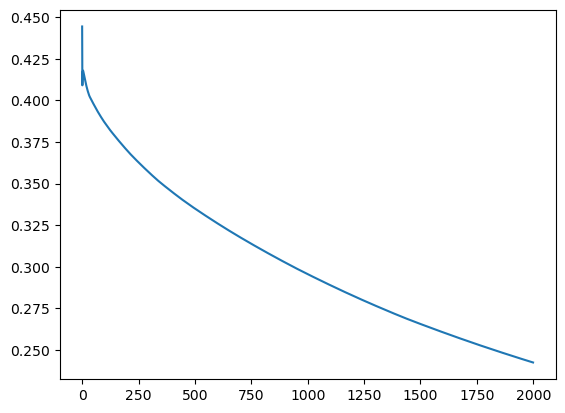

In [21]:
weights=train_model(train_set_x, train_set_y, epochs=2000)

In [22]:
prediction_train = calc_preds(train_set_x, weights)

In [ ]:
print(prediction_train)

In [23]:

results_train_set = train_set_y == (prediction_train>0.5)
print(results_train_set.mean())

0.9330143540669856


In [24]:
prediction_test = calc_preds(test_set_x, weights)
results_test_set = test_set_y == (prediction_test>0.5)
print(results_test_set.mean())

0.64


------------------------------- -------------------------  USING SIGMOID -------------------------------------------------------------------------------

In [25]:
def sigmoid(x): return 1/(1+np.exp(-x))

In [26]:
def calc_preds(X, coeffs): return sigmoid(np.dot(X, coeffs))

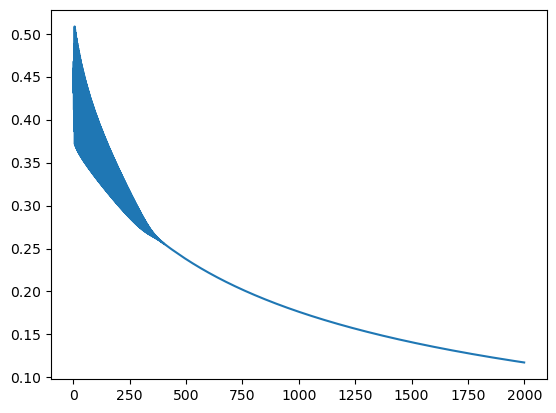

In [27]:
weights=train_model(train_set_x, train_set_y, learning_rate=0.005, epochs=2000)

In [28]:
prediction_train = calc_preds(train_set_x, weights)

In [29]:
results_train_set = train_set_y == (prediction_train>0.5)
print(results_train_set.mean())

0.9904306220095693


In [30]:
prediction_test = calc_preds(test_set_x, weights)
results_test_set = test_set_y == (prediction_test>0.5)
print(results_test_set.mean())

0.68


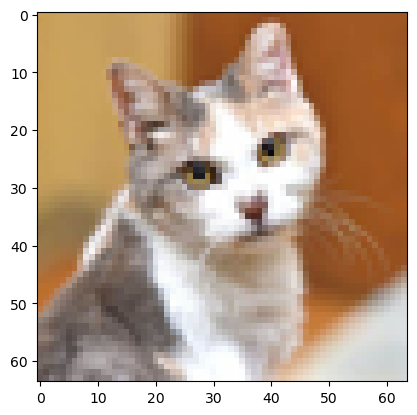

In [31]:
# change this to the name of your image file
my_image = "meow.jpg"   

# We preprocess the image to fit your algorithm.
fname = "images/" + my_image
image = np.array(Image.open(fname).resize((num_px, num_px)))
plt.imshow(image)
image = image / 255.
image = image.reshape((1, num_px * num_px * 3))
prediction_new = calc_preds(image, weights)




In [32]:
def predicted_as( prediction ): return np.squeeze( prediction ), classes[int(np.squeeze( prediction )>0.5)].decode("utf-8")



In [ ]:
predicted_as(prediction_new)

---------------------------------------------- USING A NEURAL NETWORK-------------------------------------------------------------------------------

def calc_grads( X, coeffs, Y ): return np.dot( X.T, ( calc_preds(X, coeffs) - Y ) ) / np.size( X, 0 )

In [34]:
def relu(z):
    A = np.maximum(0,z)
    return A

In [ ]:
relu(np.array([1, -1, 2, -0.2, 0]))

0.6949323274618496
cost after 0 iteration is 0.6946543995077966, output is [0.49991483]
cost after 1 iteration is 0.6942505871694925, output is [0.4996568]
cost after 2 iteration is 0.6939064930914138, output is [0.49939843]
cost after 3 iteration is 0.6936565606330498, output is [0.4991884]
cost after 4 iteration is 0.6934770479429322, output is [0.49902311]
cost after 5 iteration is 0.6933449411612619, output is [0.49889116]
cost after 6 iteration is 0.6932454194076579, output is [0.49878374]
cost after 7 iteration is 0.6931694226277507, output is [0.49869502]
cost after 8 iteration is 0.6931112522985464, output is [0.49862112]
cost after 9 iteration is 0.6930671133036833, output is [0.49855935]
cost after 10 iteration is 0.6930342943283228, output is [0.49850767]
cost after 11 iteration is 0.693010712511501, output is [0.49846444]
cost after 12 iteration is 0.6929946634348282, output is [0.49842828]
cost after 13 iteration is 0.6929846894391509, output is [0.49839794]
cost after 14 

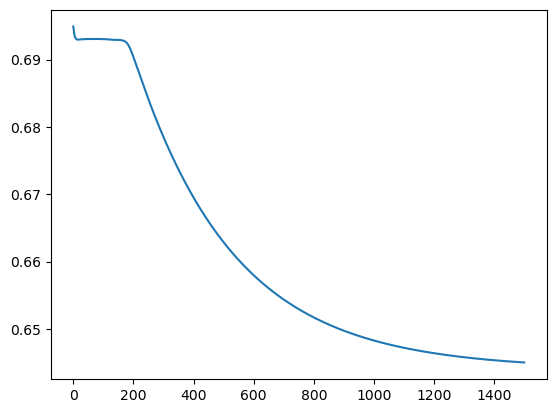

In [256]:
np.random.seed(2)
n_coeffs = train_set_x.shape[1]
m = train_set_x.shape[0]

n_hidden = 20


layer1 = np.random.randn( n_coeffs, n_hidden ) * 0.01

layer2 = np.random.randn(n_hidden, 1) * 0.01

const = np.zeros((1,1))

layer1pred = np.dot(train_set_x, layer1)

l1 = np.tanh(layer1pred)

layer2pred = np.dot(l1, layer2) + const

output = sigmoid(layer2pred)

cost = -(1/m) * np.sum(np.dot(train_set_y.T, np.log(output)) + np.dot((1-train_set_y.T), np.log(1-output)))

print(cost)
costs = []
epochs = []




for i in range(1500):
    
    costs.append(cost)
    epochs.append(i)

    dlayer2pred = output - train_set_y

    dw2 = np.dot(l1.T, dlayer2pred) / m
    db2 = np.sum(dlayer2pred, axis = 0, keepdims=True) / m

    dlayer1pred = np.dot(dlayer2pred.T, layer2pred) * (1-np.power(l1, 2))
    dw1 = np.dot(train_set_x.T, dlayer1pred)/m

    lr = 0.0003

    layer2 = layer2 - lr * dw2
    const = const - lr *db2
    layer1 = layer1 - lr * dw1

    layer1pred = np.dot(train_set_x, layer1)

    l1 = np.tanh(layer1pred)

    layer2pred = np.dot(l1, layer2) + const

    output = sigmoid(layer2pred)

    cost = -(1/m) * np.sum(np.dot(train_set_y.T, np.log(output)) + np.dot((1-train_set_y.T), np.log(1-output)))

    print(f"cost after {i} iteration is {cost}, output is {output[0]}")
plt.plot(epochs, costs)

predic = (output>0.5) == train_set_y
accuracy = predic.mean()
print(accuracy)








In [250]:
np.random.seed(2)

m = train_set_x.shape[0]

def initialize_coeffs( X, n_hidden ):
    n_coeffs = X.shape[1]
    layer1 = np.random.randn(n_coeffs, n_hidden) * 0.01
    layer2 = np.random.randn(n_hidden, 1) * 0.01
    const = np.zeros((1,1))
    coeffs = layer1, layer2, const
    return coeffs

def foward_propagation(X, coeffs):
    l1 = np.tanh(np.dot(X, coeffs[0]))
    l2 = sigmoid( np.dot(l1, coeffs[1]) + coeffs[2] )
    results = l1 , l2
    return results

def calc_cost(A2, Y):
     cost = -(1/m) * np.sum(np.dot(Y.T, np.log(A2)) + np.dot((1-Y.T), np.log(1-A2)))
     return cost





    


In [251]:

def back_propagation( X, coeffs, results, Y):

    A2 = results[1]
    A1 = results[0]

    W2 = coeffs[1]
    b2 = coeffs[2]
    W1 = coeffs[0]

    dZ2 = A2 - Y

    dW2 = (1/m) * np.dot(A1.T, dZ2)
    db2 = np.sum(dZ2, axis = 0, keepdims=True) / m

    dZ1 = np.dot(dZ2, W2.T) * (1-np.power(A1, 2))

    dW1 = (1/m) * np.dot(X.T, dZ1)
    
    grads=[dW1, dW2, db2]

    return grads

def update_coeffs(coeffs, grads, lr ):
    W1 = coeffs[0]
    W2 = coeffs[1]
    b2 = coeffs[2]
    W1 = W1 - lr * grads[0]
    W2 = W2 - lr * grads[1]
    b2 = b2 - lr * grads[2]
    coeffs = [W1, W2, b2]
    return coeffs

In [261]:



def train_model1(X, n_hidden, Y, lr, epochs):

    coeffs = initialize_coeffs( X, n_hidden )   
    costs =[]
    n_epochs = []

    for i in range(epochs):
        results = foward_propagation(X, coeffs)
        A2 = results[1]
        cost = calc_cost(A2, Y)
        costs.append(cost)
        n_epochs.append(i)
        grads = back_propagation(X, coeffs, results, Y)
        coeffs = update_coeffs(coeffs, grads, lr)
        print(f"cost after {i} iteration is {cost}")
    predic = (A2>0.5) == Y
    print(f"accuracy is {predic.mean()}")
    plt.plot(n_epochs, costs)
    return coeffs


cost after 0 iteration is 0.6930081119971632
cost after 1 iteration is 0.6849116531957082
cost after 2 iteration is 0.6782656937875057
cost after 3 iteration is 0.6726794503582268
cost after 4 iteration is 0.6679351420853274
cost after 5 iteration is 0.6639059206934441
cost after 6 iteration is 0.6605066165695148
cost after 7 iteration is 0.6576670823083725
cost after 8 iteration is 0.6553203381374111
cost after 9 iteration is 0.6533994247620192
cost after 10 iteration is 0.6518385027831375
cost after 11 iteration is 0.6505752904148385
cost after 12 iteration is 0.6495532668254747
cost after 13 iteration is 0.6487230268966034
cost after 14 iteration is 0.6480427342518632
cost after 15 iteration is 0.6474778715926658
cost after 16 iteration is 0.647000548556264
cost after 17 iteration is 0.646588594910241
cost after 18 iteration is 0.6462246033381905
cost after 19 iteration is 0.6458950235919395
cost after 20 iteration is 0.6455893608910341
cost after 21 iteration is 0.6452994981283455


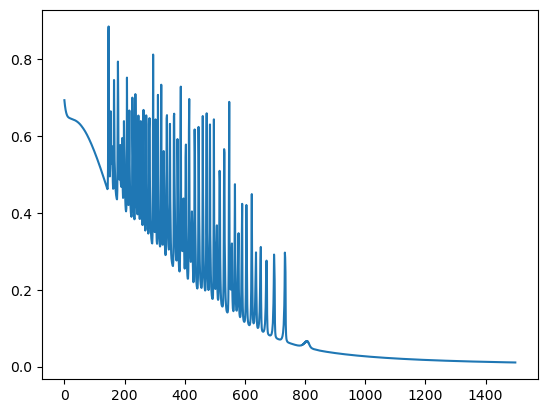

In [271]:

weights1=train_model1(train_set_x, 40, train_set_y, lr = 0.03, epochs=1500)

In [ ]:
print(initialize_coeffs(train_set_x, 4)[0].shape)

In [301]:
prediction_test = foward_propagation(test_set_x, weights1)
results_test_set = test_set_y == (prediction_test[1]>0.5)
print(results_test_set.mean())

0.76


------------------------------------------------------- BUILD AND TRAIN A NEW MODEL ON NEW DATASET    ------------------------------------------------------
--TO see that models trained on a particular distribution perform almost  always poorly on a different distribution
--To resuse the definition of neural network with n_hidden units above, i.e train_model1

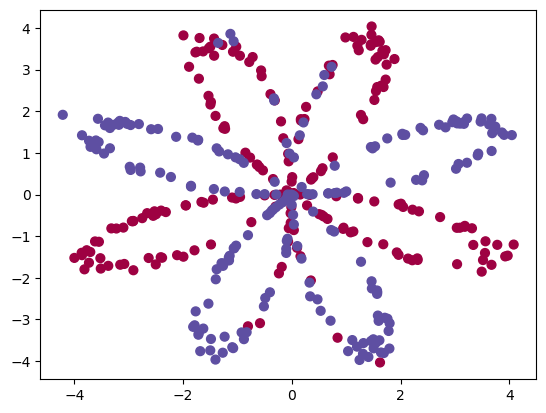

In [278]:
    np.random.seed(1)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
        
    X = X.T
    Y = Y.T

    plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

cost after 0 iteration is 0.34657217420057396
cost after 1 iteration is 0.34656435375476763
cost after 2 iteration is 0.3465557459753934
cost after 3 iteration is 0.3465451437338371
cost after 4 iteration is 0.34653113563803867
cost after 5 iteration is 0.3465119144148781
cost after 6 iteration is 0.34648504207621017
cost after 7 iteration is 0.3464471415137372
cost after 8 iteration is 0.3463934765990569
cost after 9 iteration is 0.3463173713063434
cost after 10 iteration is 0.3462094024456731
cost after 11 iteration is 0.3460562802954999
cost after 12 iteration is 0.34583930803174545
cost after 13 iteration is 0.34553228872296726
cost after 14 iteration is 0.34509873863522345
cost after 15 iteration is 0.34448829096156885
cost after 16 iteration is 0.3436322798474072
cost after 17 iteration is 0.34243875848244315
cost after 18 iteration is 0.34078774189152683
cost after 19 iteration is 0.3385283981683556
cost after 20 iteration is 0.33548125598651724
cost after 21 iteration is 0.3314

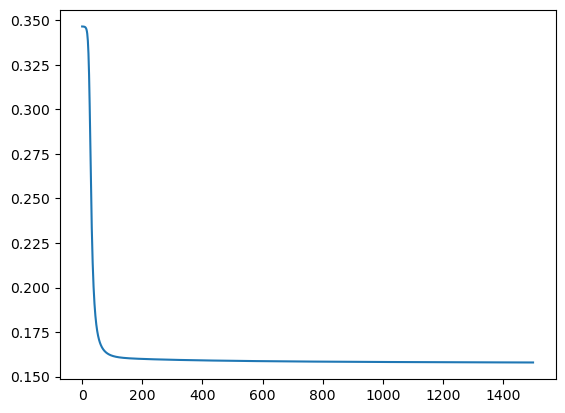

In [309]:
weight2 = train_model1(X.T, 4, Y.T, lr = 1.2, epochs=1500)

--TESTING ON NEW TARGET THAT IS PROBABLY NOT FROM THE SAME DISTRIBUTION---------

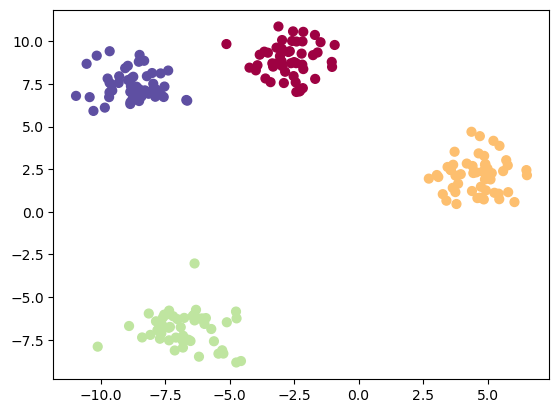

In [15]:
# Datasets
N = 200
noisy_circles = sklearn.datasets.make_circles(n_samples=N, factor=.5, noise=.3)
noisy_moons = sklearn.datasets.make_moons(n_samples=N, noise=.2)
blobs = sklearn.datasets.make_blobs(n_samples=N, random_state=42, n_features=2, centers=4)
gaussian_quantiles = sklearn.datasets.make_gaussian_quantiles(mean=None, cov=0.5, n_samples=N, n_features=2, n_classes=2, shuffle=True, random_state=None)
no_structure = np.random.rand(N, 2), np.random.rand(N, 2)

### START CODE HERE ### (choose your dataset)
dataset = blobs
### END CODE HERE ###

X, Y = dataset
X, Y = X.T, Y.reshape(1, Y.shape[0])

# make blobs binary
if dataset == "blobs":
    Y = Y%2

# Visualize the data
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

In [305]:
prediction_test = foward_propagation(X.T, weight2)
results_test_set = Y.T == (prediction_test[1]>0.5)
print(results_test_set.mean())

0.425


-------------------------------- ------------------------------------   USING A DEEP NEURAL NETWORK ----------------------------------------------------------------------
--- more than one hidden layer -----

In [ ]:
np.random.seed(200)
#init

X=train_set_x.T
Y=train_set_y.T

n_x = X.T.shape[1]
n1= 40
n2 = 4
m= X.T.shape[0]


#init(n_x, n1, n2)
layer1 = np.random.randn(n_x, n1) * 0.01
layer2 = np.random.randn(n1, n2) * 0.01
b2 = np.zeros((1,1))
layer3 = np.random.randn(n2, 1) * 0.01
b3 = np.zeros((1,1))
#coeffs = [layer1, layer2, layer3, db2, db3]


lr = 0.07

costs = []
epochs = []




for i in range(1500):

    


    #foward pass(X, coeffs)
    z1 = np.dot(X.T, layer1)
    a1 = np.tanh(z1)
    z2 = np.dot(a1, layer2) + b2
    a2 = np.tanh(z2)
    z3 = np.dot(a2, layer3) + b3
    a3 = sigmoid(z3)
    output = a3

    

    #backwardpass()

    da3 = -( np.divide(Y.T, a3) - np.divide(1-Y.T, 1-a3) )
    daz3 = np.multiply(a3, 1-a3)
    dz3 = np.multiply(da3, daz3)

    dw3 = (1/m) * np.dot(a2.T, dz3)
    db3 = (1/m) * np.sum(dz3, axis=0, keepdims=True)


    da2 = np.dot( dz3, layer3.T)
    daz2 = 1- np.power(a2, 2)
    dz2 = np.multiply(da2, daz2)

    dw2 =(1/m) * np.dot(a1.T, dz2)
    db2 =(1/m) * np.sum(dz2, axis=0, keepdims=True)


    da1 = np.dot(dz2, layer2.T)
    daz1 =  1- np.power(a1, 2)
    dz1 = np.multiply(da1, daz1)

    dw1 = (1/m) * np.dot(X, dz1)

    layer3 = layer3 - lr * dw3
    layer2 = layer2 -lr * dw2
    layer1 = layer1 - lr * dw1
    b2 = b2 -lr * db2
    b3 = b3 -lr * db3

    #cost(output, Y)

    cost = np.abs(output-Y.T).mean()

    costs.append(cost)
    epochs.append(i)

    print(f"cost after {i} iteration is {cost}")

predic = (output>0.5) == Y.T
print(f"accuracy is {predic.mean()}")


plt.plot(epochs, costs)


    


In [570]:
torch.manual_seed(400)

def init_coeffs_deep(X, hidden_layers):
    X = torch.tensor(X, dtype = torch.float)
    n_x = X.shape[1]
    sizes = [n_x] + hidden_layers + [1]
    n=len(sizes)
    layers = [ torch.rand(sizes[i], sizes[i+1]) for i in range (n-1) ]
    consts = [torch.rand(1)[0] for i in range (n-1)]

    for l in layers+consts: l.requires_grad_()
    

    return layers, consts


    

In [1]:
import torch

In [ ]:
import torch.nn.functional as F

def cal_preds(X, coeffs):
    layers, consts = coeffs
    n= len(layers)
    res = torch.tensor(X, dtype = torch.float)
    for i, l in enumerate(layers):
        res = res@l + consts[i]
        if i != n-1: res = F.relu(res)
    return torch.sigmoid(res)

a = cal_preds(train_set_x, coeffs)
print(a.shape)


In [511]:
def calculate_loss(res, Y):
    Y = torch.tensor(Y)
    loss = torch.abs(res-Y).mean()
    return loss



In [ ]:
loss=calculate_loss(a, train_set_y)
loss.backward()

In [567]:
def update_coeffs(coeffs, lr):
    layers, consts = coeffs
    for layer in layers + consts: layer.sub_(layer.grad*lr)

#b = update_coeffs(coeffs, lr=0.1)

In [ ]:



def model_t(X, hidden_layers, Y , lr, epochs):

    losses = []
    n_epochs = []
    coeffs = init_coeffs(X, hidden_layers)

    for i in range (epochs):

        res = cal_preds(X, coeffs)
        loss = calculate_loss(res, Y)
        loss.backward()
        update_coeffs(coeffs, lr)
        losses.append(loss)
        n_epochs.append(i)
    
    plt.plot(n_epochs, losses)


model_t(train_set_x, [10,10], train_set_y, 0.01, 10)










----------------------------------------------DEEP LEARNING WITH PYTORCH-----------------------------------------------------------
lets use a framework to get some abstractions in building neural networks for classification, computer vision, and learn to deploy models

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
sk = torch.tensor([[2,3],[4,5],[6,7]])
print(sk[:1,0])
sk.ndim
print(sk.shape)

#three intsances of 2, 3 vectors


In [ ]:
ten = torch.tensor([[[2,3], [4,5]], [[1,2], [3,2]]])
ten.shape
#two examples of 2, 2 matrices

In [ ]:
ten[1][0]

In [ ]:
c=np.array([1,2], dtype = int)
d=torch.from_numpy(c)

d

In [ ]:
z=torch.zeros_like(ten)
z.shape

In [ ]:
torch.manual_seed(305)
x=torch.randn(3,3, dtype=torch.float, requires_grad=True)
print(x)

with torch.enable_grad():
    y=x**2 + 16*x
    y.backward(torch.zeros_like(x))
    print(y.grad_fn(x))


In [ ]:
v=torch.ones(9,1)
v.view_as(x)

In [ ]:
x=torch.tensor([[1,2]])
x.shape[1]

In [48]:
torch.manual_seed(42)
def init_weights(X):
    coeffs =torch.randn(X.shape[1],1, dtype=torch.float64)
    return coeffs

def cal_Fwd(X, coeffs):
    results=X@coeffs
    return results

def cal_abs_cost(Y, results):
    return torch.abs(results-Y).mean()


def cal_grad(X, Y, results):
    return X.T @ (cal_Fwd(X, Y)-Y)/X.shape[0]

def one_epoc(X, Y, weights, results, lr):

    grad = cal_grad(X,Y, results)
    weights = weights - lr*grad
    cost = cal_abs_cost(Y, results)

    return grad, cost

def Mode(X,Y, lr=0.01, epochs=10):
    weights = init_weights(X)
    costs = []
    iterations = []
    for i in range (epochs):
        results = cal_Fwd(X, weights)
        grad, cost = one_epoc(X,Y, weights, results, lr)
        costs.append(cost)
        iterations.append(i)

    plt.plot(iterations, costs)
        
        


    


    




In [ ]:
X=torch.tensor([[2,4], [6,8], [10,12], [14, 16]] , dtype=torch.float64)
Y= torch.tensor([[1], [0], [1],[0]], dtype=torch.float64)

Mode(X,Y,)
X.shape[0]

In [ ]:
c=torch.tensor([1,2])
c.device
c.shape
c.dtype

In [ ]:
%%time
#change dtype

#X.type(torch.float32).dtype
X.reshape(8,1)

In [ ]:
%%time
torch.matmul(X.T,Y)

In [88]:

#numpy only works on cpus
#change tensor to numpy with tensdor.numpy(), from numpy to tensor with torch.from_numpy(numpyarray)
#device agnostic code


device ="cuda" if torch.cuda.is_available() else "cpu"

In [86]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [ ]:
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

In [ ]:
y = torch.tensor([[1, 2, 3, 4]])
y=y.unsqueeze(dim=0)
y.shape

In [1]:
import torch

In [2]:
#start
X= torch.arange(0,1, 0.01).unsqueeze(dim=1)
Y = 0.5*X + 4
train_size = int(0.8*len(X))
X_train, Y_train = X[:train_size], Y[:train_size]
X_test, Y_test = X[train_size:], Y[train_size:]
X.shape, X_train.shape, Y_train.shape

(torch.Size([100, 1]), torch.Size([80, 1]), torch.Size([80, 1]))

In [4]:
def cal_pred(X, coeffs):
  results = X@coeffs
  return results


def cal_grad(X, Y, coeffs, results):
  grad = X.T@(results.unsqueeze(dim=1) - Y)/X.shape[0]
  return grad

def one_epoch(coeffs , grad, lr =0.001):
  coeffs = coeffs - lr * grad
  return coeffs



In [3]:
import sklearn
from sklearn.datasets import make_circles

In [1]:
 torch.manual_seed(42)
with torch.inference_mode():
  
 

  p=10
  costs=[]
  epochs=[]
  coeffs = torch.randn(1)
  for i in range (p):
    results = X_train@coeffs
    cost = torch.abs(Y_train - results.unsqueeze(dim=1)).mean()
    costs.append(cost)
    epochs.append(i)
    coeffs = one_epoch(coeffs, cal_grad(X_train, Y_train, coeffs, results))
    print(f'cost after {i} is {cost}')


NameError: name 'torch' is not defined

<font color='blue'>
    
    
**What you need to remember:**

Common steps for pre-processing a new dataset are:
- Figure out the dimensions and shapes of the problem (m_train, m_test, num_px, ...)
- Reshape the datasets such that each example is now a vector of size (num_px \* num_px \* 3, 1)
- "Standardize" the data

<a name='3'></a>
## 3 - General Architecture of the learning algorithm ##

It's time to design a simple algorithm to distinguish cat images from non-cat images.

You will build a Logistic Regression, using a Neural Network mindset. The following Figure explains why **Logistic Regression is actually a very simple Neural Network!**

<img src="images/LogReg_kiank.png" style="width:650px;height:400px;">

**Mathematical expression of the algorithm**:

For one example $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

The cost is then computed by summing over all training examples:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{6}$$

**Key steps**:
In this exercise, you will carry out the following steps: 
    - Initialize the parameters of the model
    - Learn the parameters for the model by minimizing the cost  
    - Use the learned parameters to make predictions (on the test set)
    - Analyse the results and conclude

<a name='4'></a>
## 4 - Building the parts of our algorithm ## 

The main steps for building a Neural Network are:
1. Define the model structure (such as number of input features) 
2. Initialize the model's parameters
3. Loop:
    - Calculate current loss (forward propagation)
    - Calculate current gradient (backward propagation)
    - Update parameters (gradient descent)

You often build 1-3 separately and integrate them into one function we call `model()`.

<a name='4-1'></a>
### 4.1 - Helper functions

<a name='ex-3'></a>
### Exercise 3 - sigmoid
Using your code from "Python Basics", implement `sigmoid()`. As you've seen in the figure above, you need to compute $sigmoid(z) = \frac{1}{1 + e^{-z}}$ for $z = w^T x + b$ to make predictions. Use np.exp().

<a name='4-2'></a>
### 4.2 - Initializing parameters

<a name='ex-4'></a>
### Exercise 4 - initialize_with_zeros
Implement parameter initialization in the cell below. You have to initialize w as a vector of zeros. If you don't know what numpy function to use, look up np.zeros() in the Numpy library's documentation.

In [ ]:
# GRADED FUNCTION: initialize_with_zeros

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias) of type float
    """
    
    # (≈ 2 lines of code)
    # w = ...
    # b = ...
    # YOUR CODE STARTS HERE
    
    
    # YOUR CODE ENDS HERE

    return w, b

In [ ]:
dim = 2
w, b = initialize_with_zeros(dim)

assert type(b) == float
print ("w = " + str(w))
print ("b = " + str(b))

initialize_with_zeros_test_1(initialize_with_zeros)
initialize_with_zeros_test_2(initialize_with_zeros)


<a name='4-3'></a>
### 4.3 - Forward and Backward propagation

Now that your parameters are initialized, you can do the "forward" and "backward" propagation steps for learning the parameters.

<a name='ex-5'></a>
### Exercise 5 - propagate
Implement a function `propagate()` that computes the cost function and its gradient.

**Hints**:

Forward Propagation:
- You get X
- You compute $A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$
- You calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}(y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)}))$

Here are the two formulas you will be using: 

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$$

In [ ]:
# GRADED FUNCTION: propagate

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    grads -- dictionary containing the gradients of the weights and bias
            (dw -- gradient of the loss with respect to w, thus same shape as w)
            (db -- gradient of the loss with respect to b, thus same shape as b)
    cost -- negative log-likelihood cost for logistic regression
    
    Tips:
    - Write your code step by step for the propagation. np.log(), np.dot()
    """
    
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    #(≈ 2 lines of code)
    # compute activation
    # A = ...
    # compute cost by using np.dot to perform multiplication. 
    # And don't use loops for the sum.
    # cost = ...                                
    # YOUR CODE STARTS HERE
    
    
    # YOUR CODE ENDS HERE

    # BACKWARD PROPAGATION (TO FIND GRAD)
    #(≈ 2 lines of code)
    # dw = ...
    # db = ...
    # YOUR CODE STARTS HERE
    
    
    # YOUR CODE ENDS HERE
    cost = np.squeeze(np.array(cost))

    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [ ]:
w =  np.array([[1.], [2]])
b = 1.5

# X is using 3 examples, with 2 features each
# Each example is stacked column-wise
X = np.array([[1., -2., -1.], [3., 0.5, -3.2]])
Y = np.array([[1, 1, 0]])
grads, cost = propagate(w, b, X, Y)

assert type(grads["dw"]) == np.ndarray
assert grads["dw"].shape == (2, 1)
assert type(grads["db"]) == np.float64


print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

propagate_test(propagate)

**Expected output**

```
dw = [[ 0.25071532]
 [-0.06604096]]
db = -0.1250040450043965
cost = 0.15900537707692405
```

<a name='4-4'></a>
### 4.4 - Optimization
- You have initialized your parameters.
- You are also able to compute a cost function and its gradient.
- Now, you want to update the parameters using gradient descent.

<a name='ex-6'></a>
### Exercise 6 - optimize
Write down the optimization function. The goal is to learn $w$ and $b$ by minimizing the cost function $J$. For a parameter $\theta$, the update rule is $ \theta = \theta - \alpha \text{ } d\theta$, where $\alpha$ is the learning rate.

In [ ]:
# GRADED FUNCTION: optimize

def optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
    
    w = copy.deepcopy(w)
    b = copy.deepcopy(b)
    
    costs = []
    
    for i in range(num_iterations):
        # (≈ 1 lines of code)
        # Cost and gradient calculation 
        # grads, cost = ...
        # YOUR CODE STARTS HERE
        
        
        # YOUR CODE ENDS HERE
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule (≈ 2 lines of code)
        # w = ...
        # b = ...
        # YOUR CODE STARTS HERE
        
        
        # YOUR CODE ENDS HERE
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
            # Print the cost every 100 training iterations
            if print_cost:
                print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [ ]:
params, grads, costs = optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print("Costs = " + str(costs))

optimize_test(optimize)

<a name='ex-7'></a>
### Exercise 7 - predict
The previous function will output the learned w and b. We are able to use w and b to predict the labels for a dataset X. Implement the `predict()` function. There are two steps to computing predictions:

1. Calculate $\hat{Y} = A = \sigma(w^T X + b)$

2. Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector `Y_prediction`. If you wish, you can use an `if`/`else` statement in a `for` loop (though there is also a way to vectorize this). 

In [ ]:
# GRADED FUNCTION: predict

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    #(≈ 1 line of code)
    # A = ...
    # YOUR CODE STARTS HERE
    
    
    # YOUR CODE ENDS HERE
    
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        #(≈ 4 lines of code)
        # if A[0, i] > ____ :
        #     Y_prediction[0,i] = 
        # else:
        #     Y_prediction[0,i] = 
        # YOUR CODE STARTS HERE
        
        
        # YOUR CODE ENDS HERE
    
    return Y_prediction

In [ ]:
w = np.array([[0.1124579], [0.23106775]])
b = -0.3
X = np.array([[1., -1.1, -3.2],[1.2, 2., 0.1]])
print ("predictions = " + str(predict(w, b, X)))

predict_test(predict)

<font color='blue'>
    
**What to remember:**
    
You've implemented several functions that:
- Initialize (w,b)
- Optimize the loss iteratively to learn parameters (w,b):
    - Computing the cost and its gradient 
    - Updating the parameters using gradient descent
- Use the learned (w,b) to predict the labels for a given set of examples

<a name='5'></a>
## 5 - Merge all functions into a model ##

You will now see how the overall model is structured by putting together all the building blocks (functions implemented in the previous parts) together, in the right order.

<a name='ex-8'></a>
### Exercise 8 - model
Implement the model function. Use the following notation:
    - Y_prediction_test for your predictions on the test set
    - Y_prediction_train for your predictions on the train set
    - parameters, grads, costs for the outputs of optimize()

In [ ]:
# GRADED FUNCTION: model

def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to True to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    # (≈ 1 line of code)   
    # initialize parameters with zeros
    # and use the "shape" function to get the first dimension of X_train
    # w, b = ...
    
    #(≈ 1 line of code)
    # Gradient descent 
    # params, grads, costs = ...
    
    # Retrieve parameters w and b from dictionary "params"
    # w = ...
    # b = ...
    
    # Predict test/train set examples (≈ 2 lines of code)
    # Y_prediction_test = ...
    # Y_prediction_train = ...
    
    # YOUR CODE STARTS HERE
    
    
    # YOUR CODE ENDS HERE

    # Print train/test Errors
    if print_cost:
        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [ ]:
from public_tests import *

model_test(model)

If you pass all the tests, run the following cell to train your model.

In [ ]:
logistic_regression_model = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=2000, learning_rate=0.005, print_cost=True)

**Comment**: Training accuracy is close to 100%. This is a good sanity check: your model is working and has high enough capacity to fit the training data. Test accuracy is 70%. It is actually not bad for this simple model, given the small dataset we used and that logistic regression is a linear classifier. But no worries, you'll build an even better classifier next week!

Also, you see that the model is clearly overfitting the training data. Later in this specialization you will learn how to reduce overfitting, for example by using regularization. Using the code below (and changing the `index` variable) you can look at predictions on pictures of the test set.

In [ ]:
# Example of a picture that was wrongly classified.
index = 1
plt.imshow(test_set_x[:, index].reshape((num_px, num_px, 3)))
print ("y = " + str(test_set_y[0,index]) + ", you predicted that it is a \"" + classes[int(logistic_regression_model['Y_prediction_test'][0,index])].decode("utf-8") +  "\" picture.")

Let's also plot the cost function and the gradients.

In [ ]:
# Plot learning curve (with costs)
costs = np.squeeze(logistic_regression_model['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(logistic_regression_model["learning_rate"]))
plt.show()

**Interpretation**:
You can see the cost decreasing. It shows that the parameters are being learned. However, you see that you could train the model even more on the training set. Try to increase the number of iterations in the cell above and rerun the cells. You might see that the training set accuracy goes up, but the test set accuracy goes down. This is called overfitting. 

<a name='6'></a>
## 6 - Further analysis (optional/ungraded exercise) ##

Congratulations on building your first image classification model. Let's analyze it further, and examine possible choices for the learning rate $\alpha$. 

#### Choice of learning rate ####

**Reminder**:
In order for Gradient Descent to work you must choose the learning rate wisely. The learning rate $\alpha$  determines how rapidly we update the parameters. If the learning rate is too large we may "overshoot" the optimal value. Similarly, if it is too small we will need too many iterations to converge to the best values. That's why it is crucial to use a well-tuned learning rate.

Let's compare the learning curve of our model with several choices of learning rates. Run the cell below. This should take about 1 minute. Feel free also to try different values than the three we have initialized the `learning_rates` variable to contain, and see what happens. 

In [ ]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}

for lr in learning_rates:
    print ("Training a model with learning rate: " + str(lr))
    models[str(lr)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=1500, learning_rate=lr, print_cost=False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for lr in learning_rates:
    plt.plot(np.squeeze(models[str(lr)]["costs"]), label=str(models[str(lr)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

**Interpretation**: 
- Different learning rates give different costs and thus different predictions results.
- If the learning rate is too large (0.01), the cost may oscillate up and down. It may even diverge (though in this example, using 0.01 still eventually ends up at a good value for the cost). 
- A lower cost doesn't mean a better model. You have to check if there is possibly overfitting. It happens when the training accuracy is a lot higher than the test accuracy.
- In deep learning, we usually recommend that you: 
    - Choose the learning rate that better minimizes the cost function.
    - If your model overfits, use other techniques to reduce overfitting. (We'll talk about this in later videos.) 


<a name='7'></a>
## 7 - Test with your own image (optional/ungraded exercise) ##

Congratulations on finishing this assignment. You can use your own image and see the output of your model. To do that:
    1. Click on "File" in the upper bar of this notebook, then click "Open" to go on your Coursera Hub.
    2. Add your image to this Jupyter Notebook's directory, in the "images" folder
    3. Change your image's name in the following code
    4. Run the code and check if the algorithm is right (1 = cat, 0 = non-cat)!

In [ ]:
# change this to the name of your image file
my_image = "my_image.jpg"   

# We preprocess the image to fit your algorithm.
fname = "images/" + my_image
image = np.array(Image.open(fname).resize((num_px, num_px)))
plt.imshow(image)
image = image / 255.
image = image.reshape((1, num_px * num_px * 3)).T
my_predicted_image = predict(logistic_regression_model["w"], logistic_regression_model["b"], image)

print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")

<font color='blue'>
    
**What to remember from this assignment:**
1. Preprocessing the dataset is important.
2. You implemented each function separately: initialize(), propagate(), optimize(). Then you built a model().
3. Tuning the learning rate (which is an example of a "hyperparameter") can make a big difference to the algorithm. You will see more examples of this later in this course!

Finally, if you'd like, we invite you to try different things on this Notebook. Make sure you submit before trying anything. Once you submit, things you can play with include:
    - Play with the learning rate and the number of iterations
    - Try different initialization methods and compare the results
    - Test other preprocessings (center the data, or divide each row by its standard deviation)

Bibliography:
- http://www.wildml.com/2015/09/implementing-a-neural-network-from-scratch/
- https://stats.stackexchange.com/questions/211436/why-do-we-normalize-images-by-subtracting-the-datasets-image-mean-and-not-the-c